# Import packages

In [178]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


# Load datasets and analysis

Train size: 891
Test size: 418

Test set has no column "Survived".

Null values in columns: "Age", "Cabin", "Embarked" and "Fare".


In [179]:
def load_data(files):
    dfs = []
    for f in files:
        df = pd.read_csv(f)
        dfs.append(df)
    return dfs


train_df, test_df = load_data(["train.csv", "test.csv"])
train_df.info()
print("_"*40, "\n")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-nu

# Stats


Survived: 38.38 %
No parents or children: 76.09 %
With sibling or spouse: 31.76 %
Fare > $262: 1 %
Elderly (65-80): 0.79 %
Different names: 891/891
Male/female: 577/314
Number of cabins: 148
Number of tickets: 681


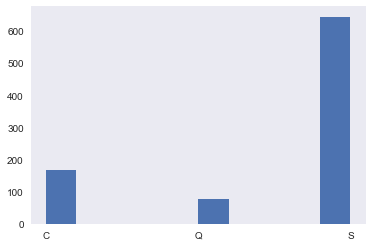

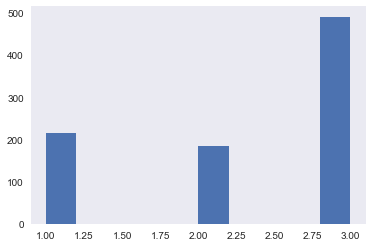

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Renouf, Mr. Peter Henry",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [180]:
surv = train_df.Survived.mean()
noparch = (train_df.Parch == 0).mean()
sibsp = (train_df.SibSp > 0).mean()
high_fare = train_df.Fare.quantile(0.99, interpolation="higher")
train_df.Age
elderly = ((train_df.Age > 65) & (train_df.Age < 80)).mean()
n_male = (train_df.Sex == "male").sum()
n_female = (train_df.Sex == "female").sum()
n_cabins = len(train_df.Cabin.unique())
n_tickets = len(train_df.Ticket.unique())


print("Survived: {:.2f} %".format(surv*100))
print("No parents or children: {:.2f} %".format(noparch*100))
print("With sibling or spouse: {:.2f} %".format(sibsp*100))
print("Fare > ${:.0f}: {:d} %".format(high_fare, 1))
print("Elderly (65-80): {:.2f} %".format(elderly*100))
print("Different names: {:d}/{:d}".format(len(train_df.Name.unique()), len(train_df.Name)))
print("Male/female: {:d}/{:d}".format(n_male, n_female))
print("Number of cabins: {:d}".format(n_cabins))
print("Number of tickets: {:d}".format(n_tickets))


train_df.Embarked.hist(grid=False)
plt.show()
train_df.Pclass.hist(grid=False)
plt.show()

display(train_df.describe())
display(train_df.describe(include=["O"]))


# Quick data analysis


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333
female,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000


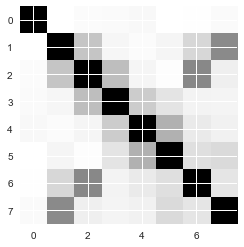

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


,Sex,Survived
0,female,0.742038
1,male,0.188908


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [181]:
train_df["female"] = (train_df.Sex == "female")
display(train_df.corr())
plt.imshow(train_df.corr().abs().as_matrix(), cmap="Greys")
plt.show()
train_df.drop("female", axis=1, inplace=True)

display(train_df[["Survived", "Pclass"]].groupby("Pclass", as_index=False).mean().sort_values(by="Survived", ascending=False))
display(train_df[["Survived", "Sex"]].groupby("Sex", as_index=False).mean().sort_values(by="Survived", ascending=False))
display(train_df[["Survived", "SibSp"]].groupby("SibSp", as_index=False).mean().sort_values(by="Survived", ascending=False))
display(train_df[["Survived", "Parch"]].groupby("Parch", as_index=False).mean().sort_values(by="Survived", ascending=False))


# Correlation histograms

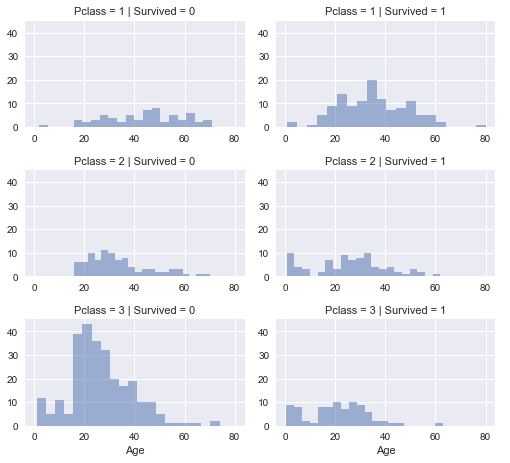

In [182]:
grid = sns.FacetGrid(train_df, col="Survived", row="Pclass", size=2.2, aspect=1.6)
grid.map(plt.hist, "Age", alpha=.5, bins=20)
grid.add_legend()
plt.show()

c:\users\tzeth\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\tzeth\anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


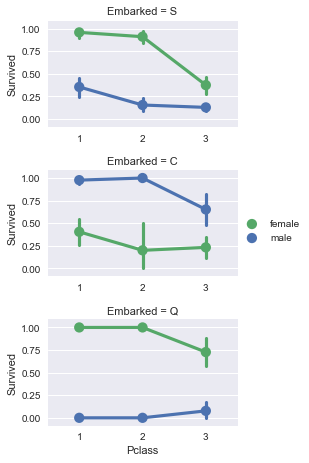

In [183]:
grid = sns.FacetGrid(train_df, row="Embarked", size=2.2, aspect=1.6)
grid.map(sns.pointplot, "Pclass", "Survived", "Sex", palette="deep")
grid.add_legend()


c:\users\tzeth\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


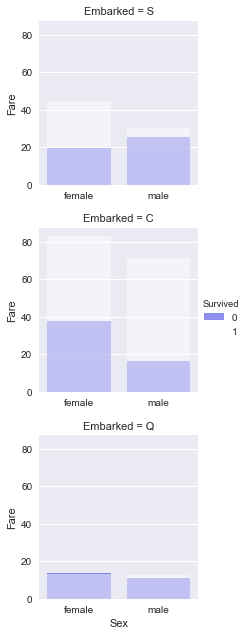

In [184]:
grid = sns.FacetGrid(train_df, row="Embarked", hue="Survived", palette={0: "b", 1: "w"})
grid.map(sns.barplot, "Sex", "Fare", alpha=.5, ci=None)
grid.add_legend()

# Wrangle data


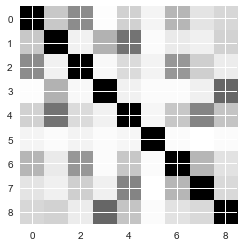

In [525]:
def wrangle_data(f_train, f_test, f_subm):
    surv, = load_data([f_subm])
    dfs = []
    
    for f in [f_train, f_test]:
        df, = load_data([f])
        
        if not ("Survived" in df):
            df = df.merge(surv)
        
#         cabins = df["Cabin"].copy()
#         cabins.loc[cabins.notnull()] = cabins.loc[cabins.notnull()].str[0]
#         df = df.join(pd.get_dummies(cabins, prefix="Cabin"), how="outer")
#         if ("Cabin_T" in df):
#             df.drop("Cabin_T", axis=1, inplace=True)
        
        title = df["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)
        title.replace(["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major",\
                       "Rev", "Sir", "Jonkheer", "Dona"], "Rare", inplace=True)
        title.replace(["Mlle", "Ms"], "Miss", inplace=True)
        title.replace("Mme", "Mrs", inplace=True)
        title = title.map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
        df["Title"] = title.fillna(0).astype(int)
        
        df["Sex"] = df["Sex"].map({"female": 1, "male": 0}).astype(int)
        
        age = df["Age"].copy()
        for i in range(0,2):
            for j in range(1,4):
                idx = (df["Sex"] == i) & (df["Pclass"] == j)
                idx_agenan = age.isnull()
                age[idx & idx_agenan] = age[idx].median()        
        age.loc[age <= 16] = 0
        age.loc[(16 < age) & (age <= 32)] = 1
        age.loc[(32 < age) & (age <= 48)] = 2
        age.loc[(48 < age) & (age <= 64)] = 3
        age.loc[age > 64] = 4
        df["Age"] = age.astype(int)
        
        df["IsAlone"] = 0
        df.loc[df["SibSp"] + df["Parch"] == 0, "IsAlone"] = 1
        
        df["Age*Class"] = df["Age"] * df["Pclass"]
        
        emb = df["Embarked"].copy()
        emb.fillna(emb.dropna().mode()[0], inplace=True)
        df["Embarked"] = emb.map({"S":0, "C":1, "Q":2}).astype(int)
        
        fare = df["Fare"].copy()
        fare.fillna(fare.dropna().median(), inplace=True)
        fare.loc[fare <= 7.91] = 0
        fare.loc[(7.91 < fare) & (fare <= 14.454)] = 1
        fare.loc[(14.454 < fare) & (fare <= 31)] = 2
        fare.loc[31 < fare] = 3
        df["Fare"] = fare.astype(int)
        
        df.drop(["PassengerId", "Name", "Ticket", "SibSp", "Parch", "Cabin"], axis=1, inplace=True)
        dfs.append(df)
        
    return dfs

train_df, test_df = wrangle_data("train.csv", "test.csv", "gender_submission.csv")

plt.imshow(train_df.corr().abs().as_matrix(), cmap="Greys")

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("Survived", axis=1)
Y_test = test_df["Survived"]


# Training models
## Logistic regression

In [524]:
models = dict()
accs = {"acc_train": [], "acc_test": []}

models["Logistic Regression"] = LogisticRegression()
models["Support Vector Machine"] = SVC()
models["K Nearest Neighbors"] = KNeighborsClassifier(n_neighbors=3)
models["Gaussian Naive Bayes"] = GaussianNB()
models["Perceptron"] = Perceptron()
models["Linear SVC"] = LinearSVC()
models["Stochastic Gradient Descent"] = SGDClassifier()
models["Decision Tree"] = DecisionTreeClassifier()
models["Random Forest"] = RandomForestClassifier(n_estimators=100)

for model in models.values():
    model.fit(X_train, Y_train)
    
    accs["acc_train"].append(model.score(X_train, Y_train))
    accs["acc_test"].append(model.score(X_test, Y_test))
    
result_df = pd.DataFrame(data=accs, index=models.keys())
result_df.sort_values("acc_train", ascending=False)


c:\users\tzeth\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\tzeth\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


,acc_test,acc_train
Decision Tree,0.834928,0.893378
Random Forest,0.827751,0.893378
K Nearest Neighbors,0.813397,0.858586
Support Vector Machine,0.928230,0.826038
Logistic Regression,0.935407,0.815937
Linear SVC,0.961722,0.801347
Perceptron,0.925837,0.794613
Stochastic Gradient Descent,0.808612,0.746352
Gaussian Naive Bayes,0.674641,0.729517
